# **Introduction**
Here, we will perform an EDA on used cars dataset and gain some valuable 
insights on what all factors affect a car's price.



# **Problem Statement**
Identify the factors that affect a second-hand car's value

Questions we will be answering:


*   Which is the most popular car brand?
*   Which engine type is preferred the most and how is price affected by it?
*   What car body type is the most popular and how is price affected by it?
*   What model year cars are high for sale?
*   How do the model year affects the resale values in different brands?
*   What is the percentage of unregistered cars?
*   How do unregistered car differ from registered car in price?





In [1]:
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [2]:
from google.colab import files
 
 
uploaded = files.upload()
 

Saving car_sales.csv to car_sales.csv


In [7]:
import io
 
data = pd.read_csv(io.BytesIO(uploaded['car_sales.csv']),encoding='cp1252')
print('Data Shape:', data.shape)
data.sample(10)


Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
7425,Dacia,5550.0,other,124,1.6,Gas,yes,2007,Logan,front
2199,Mercedes-Benz,12800.0,other,116,2.2,Diesel,yes,2013,Vito ãðóç.,NaN
7968,Toyota,2200.0,hatch,50,2.0,Petrol,yes,1991,Carina,front
3056,Renault,3900.0,van,202,1.9,Diesel,yes,2001,Kangoo ïàññ.,front
2374,BMW,86999.0,crossover,0,3.0,Diesel,yes,2016,X6,full
3183,Skoda,11111.0,sedan,99,1.6,Petrol,yes,2011,Octavia A5,front
6183,Volkswagen,6700.0,other,207,1.9,Diesel,yes,2004,Caddy ïàññ.,front
2783,Mercedes-Benz,11700.0,sedan,246,5.0,Petrol,yes,2004,S 500,full
5455,Mitsubishi,28500.0,crossover,0,2.0,Petrol,yes,2016,Outlander,full
3282,Mazda,7200.0,sedan,127,1.6,Other,yes,2005,3,front


# Data Description

In [8]:
data.describe()


,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


# Some Derivations from this data:
Minimum price of a car is 0$. We should look into more details of these specific free cars before concluding.

Minimum mileage is also 0, but it wouldn't be surprising as there are owners who regret buying a first-hand car and sell it then.

# Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


# Note
Column engV which specifies the engine version can be dropped as it provides no sufficient or useful insights to the data.

In [10]:
data.drop(['engV'], axis=1, inplace=True)
data.head()


,car,price,body,mileage,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,Other,yes,2013,E-Class,NaN


Let's check for rows which have price as 0.00$ .

In [11]:
data.loc[data.price == 0]

,car,price,body,mileage,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,Petrol,yes,2014,Panamera,full
...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,Diesel,yes,2008,Kangoo ïàññ.,front


There are 267 zero values for price! Maybe the entry person forgot to input the price or the owner was not willing to disclose the price to unwilling buyers.

We will consider dropping these rows.

In [12]:
data.drop(data[data.price == 0].index, inplace=True)
data.head()

,car,price,body,mileage,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,Other,yes,2013,E-Class,NaN


In [13]:
data.shape

(9309, 9)

# Question 1:
Which is the most popular car brand?


In [14]:
popular_brands = data.car.value_counts().head(10)
popular_brands

Volkswagen       908
Mercedes-Benz    852
BMW              669
Toyota           523
VAZ              480
Renault          456
Audi             442
Opel             395
Nissan           366
Skoda            363
Name: car, dtype: int64

Let's visualise the above data using a bar chart

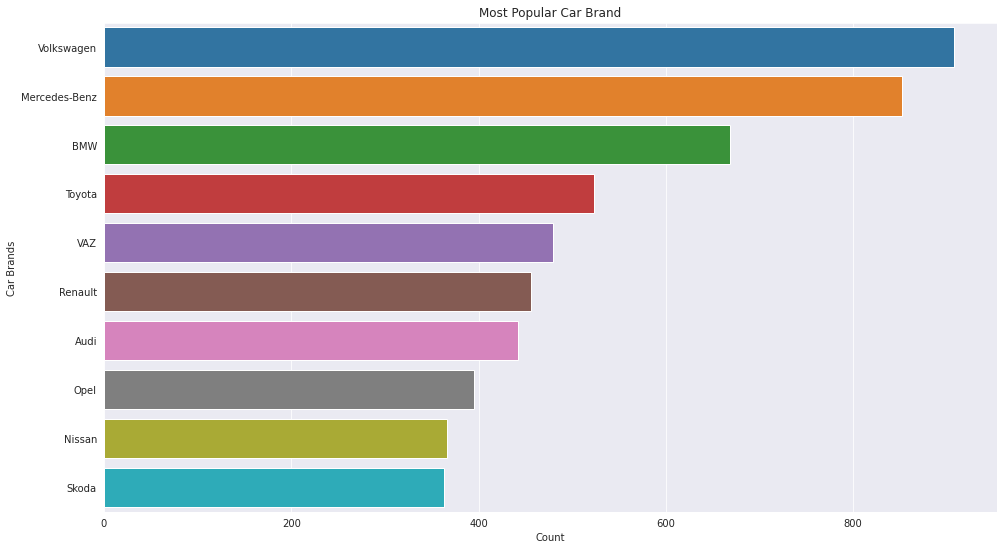

In [15]:
plt.figure(figsize=(16,9))
plt.title('Most Popular Car Brand')
plt.xlabel('Count')
plt.ylabel('Car Brands')
sns.barplot(x = popular_brands.values, y = popular_brands.index);

## Conclusion
Volkswagen and Mercedes-Benz are the most popular brands

# Question 2:
Which engine type is preferred the most?

Visualizing this data using a donut chart

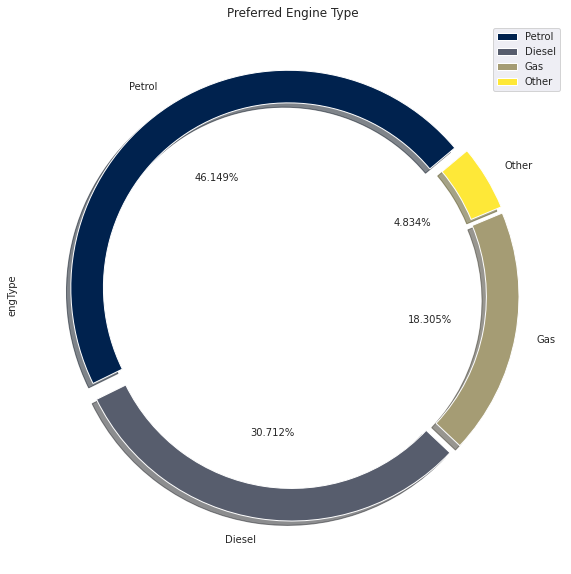

In [16]:
plt.figure(figsize=(10,10))
plt.title("Preferred Engine Type")
space = np.ones(4)/25 
data['engType'].value_counts().plot(kind='pie', explode=space, autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(10,10), shadow=True, cmap='cividis', legend=True);

## Conclusion
Petrol is the most preferred engine type

Let's see whether this data of engine type variates for the top car brands.

In [17]:
topbrands = ['Volkswagen','Mercedes-Benz','BMW', 'Toyota', 'VAZ', 'Renault', 'Audi', 'Opel', 'Nissan', 'Skoda']
topbrands_df = data.loc[data.car.isin(topbrands)]

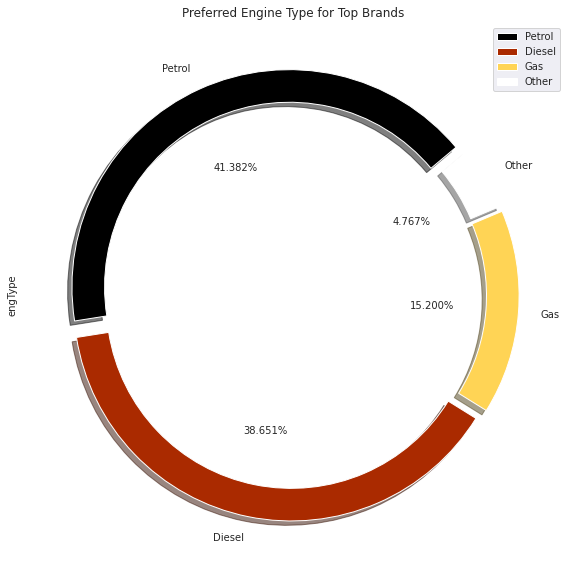

In [18]:
plt.figure(figsize=(10,10))
plt.title("Preferred Engine Type for Top Brands")
space = np.ones(4)/25 
topbrands_df['engType'].value_counts().plot(kind='pie', explode=space, autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(10,10), shadow=True, cmap='afmhot', legend=True);

## Observation
Though for overall data Petrol engine type preference is higher, when analysed for top car brands, Petrol and Diesel engine types are almost equally preferred.

Gas engine type preference in popular brands is lower. Mainly, due to the fact that the top brands don't prefer making more of gas engine type cars.

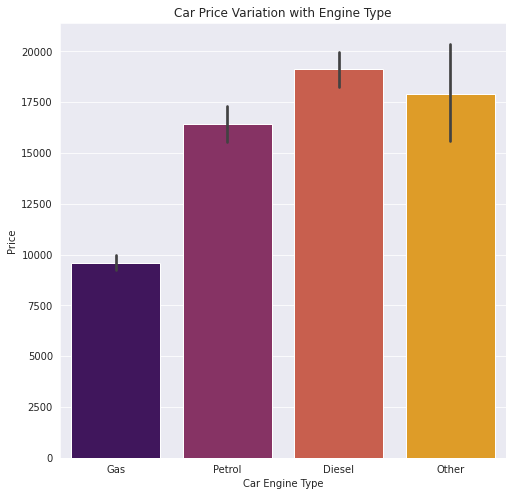

In [19]:
plt.figure(figsize=(8,8))
sns.barplot( x=data.engType, y=data.price, data=data, palette='inferno');
plt.xlabel('Car Engine Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Engine Type');

# Question 3:
What car body type is the most popular?

In [20]:
popular_bodyType = data.body.value_counts()
popular_bodyType

sedan        3585
crossover    1971
hatch        1236
van          1007
other         810
vagon         700
Name: body, dtype: int64

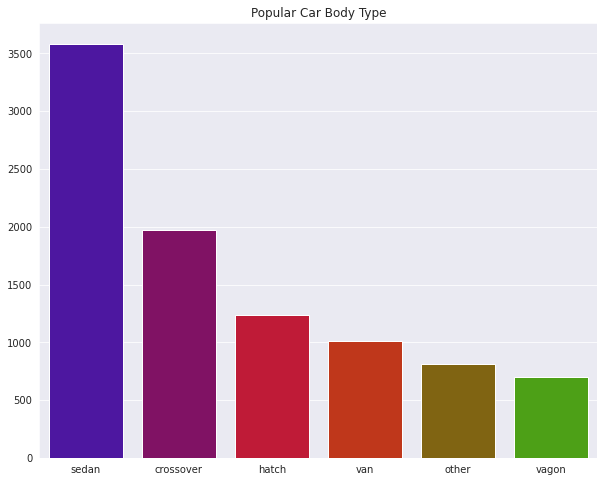

In [21]:
plt.figure(figsize=(10,8))
plt.title('Popular Car Body Type')
sns.barplot(x = popular_bodyType.index, y = popular_bodyType.values, palette='brg');

# Conclusion
Sedan is the most popular body type among cars. Although there are significant number of other body type cars too. People usually buy cars of specific body type related to their requirements.



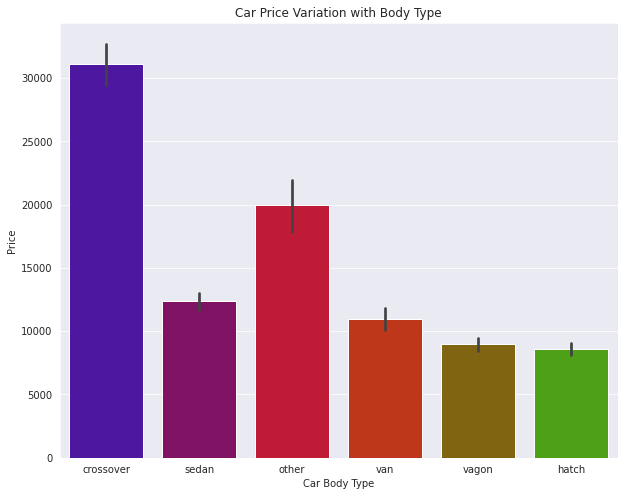

In [22]:
plt.figure(figsize=(10,8))
sns.barplot( x=data.body, y=data.price, data=data, palette='brg');
plt.xlabel('Car Body Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Body Type');

# Observation
As Sedan is a popular body type, it's price is economic. While, crossover is the most expensive body type.

# Question 4:
What model year cars are high for sale?

For this, we will group the years in 8 groups each consisting of 8 years.

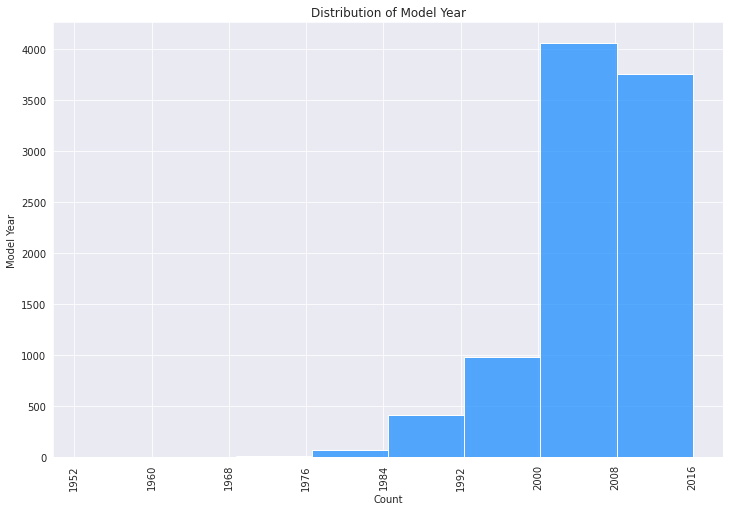

In [23]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Model Year');
plt.xlabel('Count')
plt.ylabel('Model Year')
sns.histplot(x=data.year, bins=8, color='dodgerblue');
bins = [1952, 1960, 1968, 1976, 1984, 1992, 2000, 2008, 2016];
plt.xticks(bins, rotation=90);

# Conclusion
As we can see, 2000-2008 and 2008-2016 model year group has a large number of cars for sale. For analysis of price, we will consider these groups separately.

# Question 5:
How do the model year affects the resale values in different brands?



> The value of a car drops as it ages. But, it won't be the same for all brands. Let's check out which brand's price is affected the most, considering the top brands only.





> Separate dataframe for year group 2008-2016.





In [24]:
yeargroup_08_16 = topbrands_df.loc[data.year >= 2008]
yeargroup_08_16.shape

(2640, 9)



> Separate dataframe for year group 2000-2008.



In [25]:
yeargroup_00_08 = topbrands_df.loc[(data.year < 2008) & (data.year >= 2000)]
yeargroup_00_08.shape

(1885, 9)



> Plotting a stacked chart for the above dataframes.


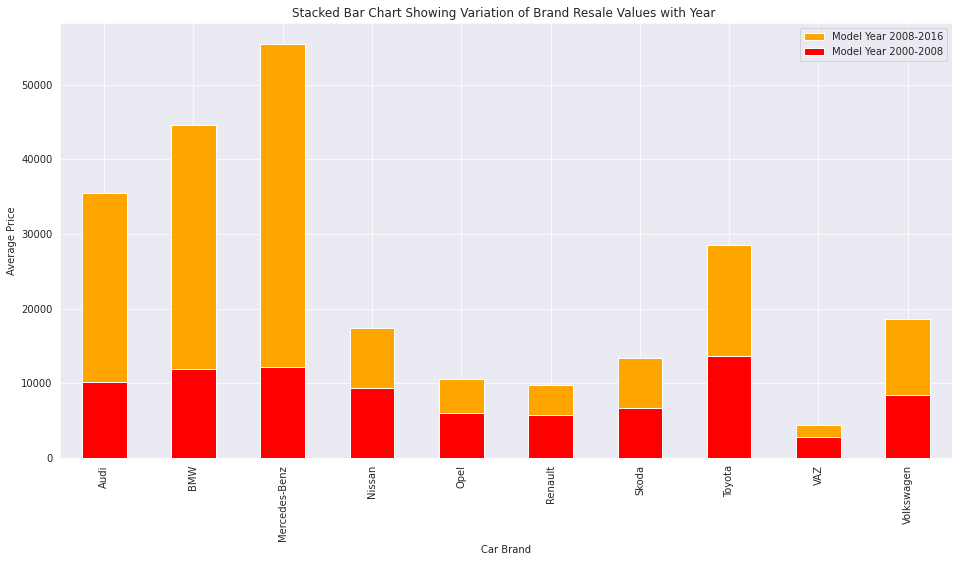

In [26]:
yeargroup_08_16.groupby(['car'])['price'].mean().plot(kind='bar', figsize=(16,8), color='orange');
yeargroup_00_08.groupby(['car'])['price'].mean().plot(kind='bar', figsize=(16,8), color='red');
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.title('Stacked Bar Chart Showing Variation of Brand Resale Values with Year ')
plt.legend(labels=('Model Year 2008-2016', 'Model Year 2000-2008'));

# Conclusion
Mercedes-Benz, BMW and Audi is affected the most. It reduces drastically with year. Definitely as they are all luxury brands.

Other Brands is more stable. These brands are more common and are used by common people, hence they are economically more stable and affordable.

# Question 6
What is the percentage of unregistered cars?

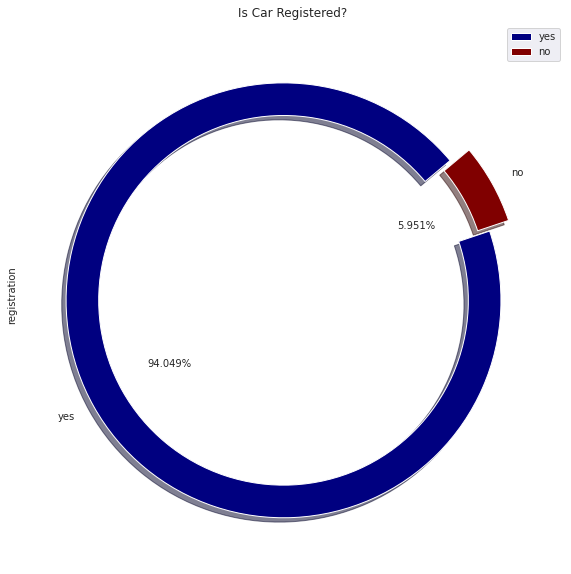

In [27]:
data['registration'].value_counts().plot(kind='pie', explode=(0.05, 0.05), autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(10,10), shadow=True, cmap='jet', legend=True);
plt.title('Is Car Registered?');

# Conclusion
Though, the price of unregistered cars is lower, people usually don't prefer buying one.

# Question 7:
How do unregistered car differ from registered car in price?




> Year group 2008- 2016 is taken into consideration with top brands.



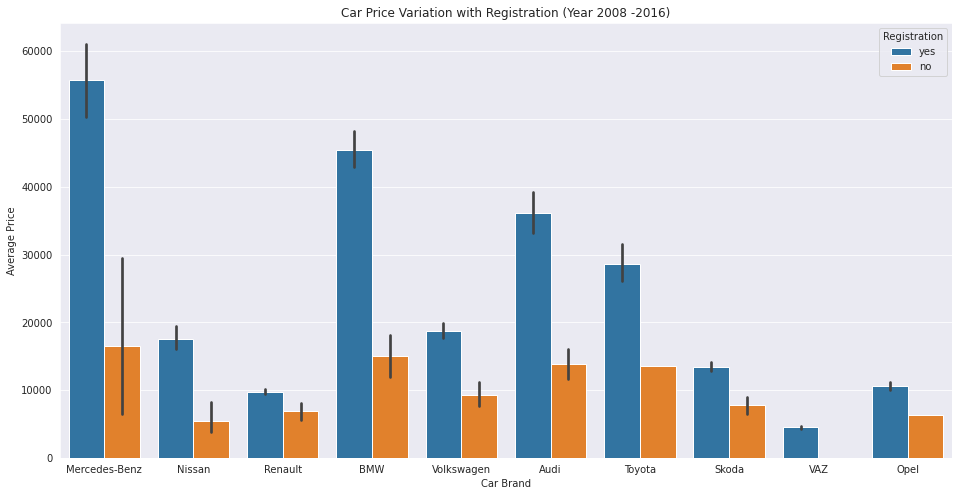

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(x=yeargroup_08_16.car, y=yeargroup_08_16.price, data=yeargroup_08_16, hue=yeargroup_08_16.registration);
plt.legend(title='Registration',loc='upper right')
plt.xlabel('Car Brand');
plt.ylabel('Average Price');
plt.title('Car Price Variation with Registration (Year 2008 -2016)');



> For year group 2000 - 2008.



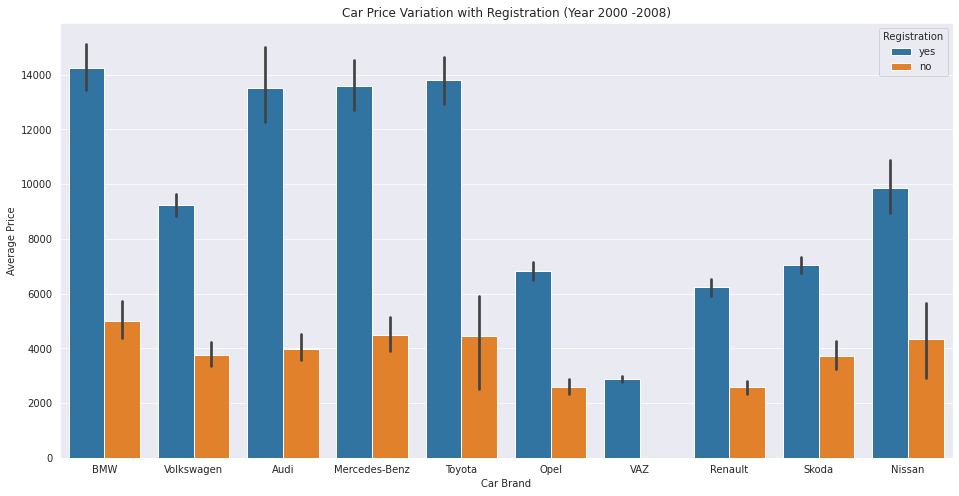

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(x=yeargroup_00_08.car, y=yeargroup_00_08.price, data=yeargroup_00_08, hue=yeargroup_00_08.registration);
plt.legend(title='Registration',loc='upper right')
plt.xlabel('Car Brand');
plt.ylabel('Average Price');
plt.title('Car Price Variation with Registration (Year 2000 -2008)');

# Conclusion
At all times, unregistered car's price is significantly lower than the registered car's price. Probably due to the risks of possesing an unregistered car. Therefore, it is not preferred.


# Summarization
After a long complete analysis on used cars, let's conclude and gain some actionable insights.

> Volkswagen and Mercedes-Benz are the most popular brands. Volkswagen is an economic brand, whereas Mercedes_benz is a luxury brand.

> Petrol engine type is most preferred, while diesel is preferred comparatively little lesser.

> Sedan is the most popular body type. There are significant number of other body type cars available too.

> Cars of the model year, from around last 15 years (2000- 2016) are high for sale.

> Resale values of luxury brands suffer more when compared to economic brands.
Unregistered cars, though cheaper in price, are not preferred.

> Car with popular specifications are comparatively cheaper than others.





# THANK YOU!